<a href="https://colab.research.google.com/github/atosiroy/CV_Tirana/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Load image

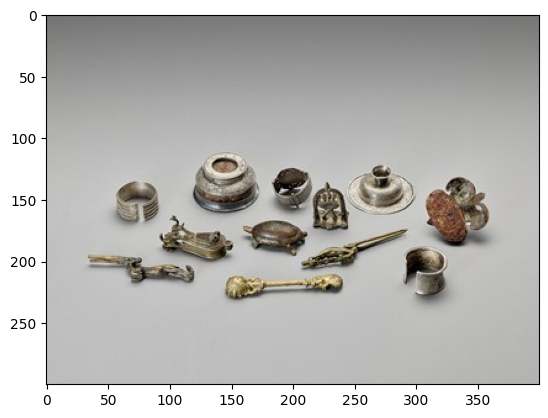

In [5]:
import matplotlib.pyplot as plt
import skimage as sk
from skimage import io

from skimage.filters import threshold_otsu
from skimage.measure import label

# 1. read RGB image
I = sk.io.imread('/content/drive/MyDrive/UPT/CV/metal.jpg')
plt.imshow(I)


2.Convert from RGB to grayscale

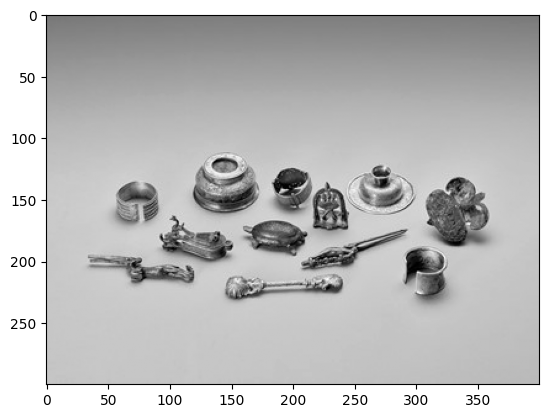

In [6]:
IG = sk.color.rgb2gray(I) # Convert RGB image to grayscale
plt.imshow(IG,cmap='gray')

3. Gamma correction with gamma = 0.5

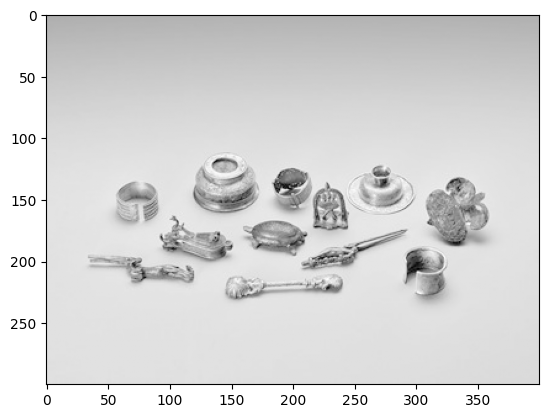

In [7]:
from skimage import exposure

IGC = exposure.adjust_gamma(IG, 0.5)
plt.imshow(IGC,cmap='gray')

4. Otsu threshold from grayscale (non gamma corrected)

In [8]:
# Apply Otsu threshold for segmentation :
thresh = threshold_otsu(IG)
print(thresh)

0.5886965180759804


5. Apply Otsu's threhold to gamma-corrected image

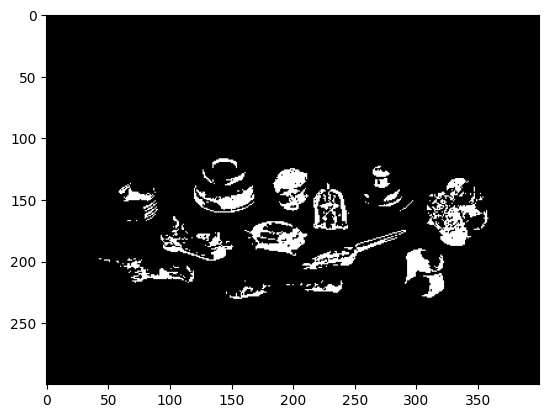

In [9]:
bw = IGC < thresh # keep lighter regions with grayscale intensities above threshold
plt.imshow(bw,cmap='gray')

6. Label the objects

number of regions is 108


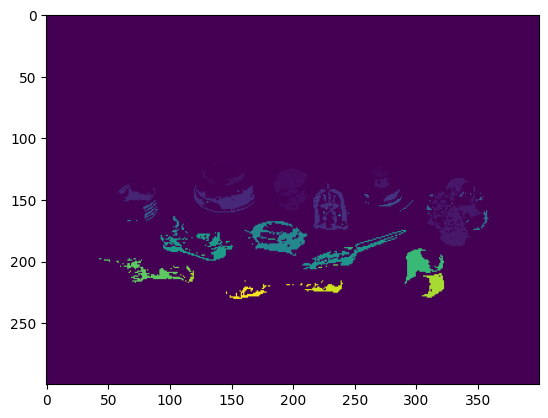

In [10]:
label_image, nregions = label(bw,return_num=True)

plt.imshow(label_image)
print('number of regions is {}'.format(nregions))

7. Extract regional properties ( area and eccentricity )



In [11]:
import pandas as pd
from skimage import measure

props = measure.regionprops_table(label_image,properties=['label','area','eccentricity'])

df_features = pd.DataFrame(props)
df_features.head()

,label,area,eccentricity
0,1,63.0,0.961171
1,2,69.0,0.832598
2,3,552.0,0.693062
3,4,22.0,0.970023
4,5,61.0,0.962557


<Axes: xlabel='area', ylabel='eccentricity'>

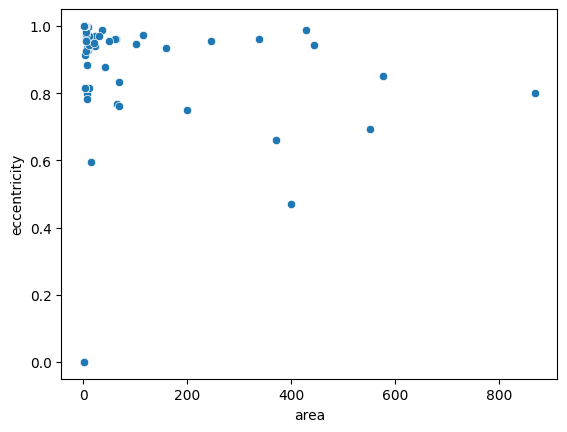

In [12]:
import seaborn as sns

sns.scatterplot(x='area',y='eccentricity',data=df_features)

8. Find metals as objects with area higher than 100 and eccentricity lower than 0.8

In [21]:
df_metals = df_features.loc[(df_features['area']>100) & (df_features['eccentricity']<1)]

df_metals.head()
print('number of idenfitied metals is {}'.format(df_metals.shape[0]))

number of idenfitied metals is 13


In [22]:
indx_metals = df_metals['label'].values

In [23]:
indx_metals

array([  3,   7,  11,  12,  15,  50,  56,  59,  73,  81,  94, 100, 107])

In [24]:
import numpy as np
mask_metals = np.isin(label_image,indx_metals)

9. Plot the metals

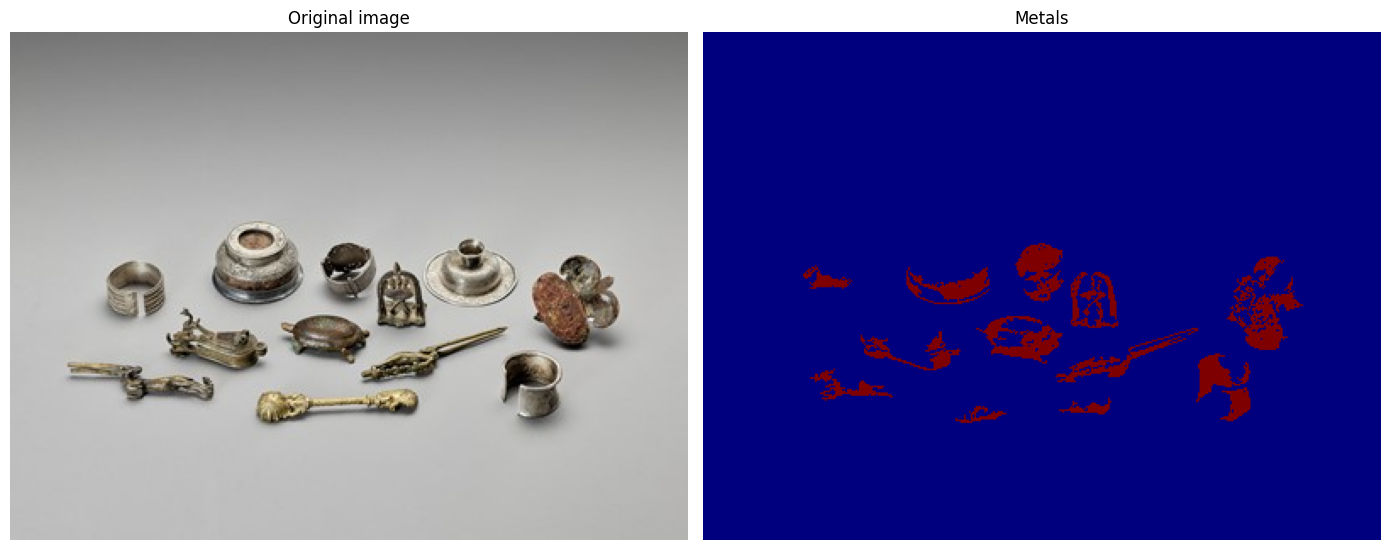

In [25]:
# Get some figures:
fig, axes = plt.subplots(1,2,figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(I)
ax[0].set_title('Original image')
ax[1].imshow(mask_metals,cmap=plt.cm.jet)
ax[1].set_title('Metals') # set figure title
ax[0].set_axis_off()
ax[1].set_axis_off()
plt.tight_layout()
plt.show()